In [1]:
!pip install -U seaborn

In [2]:
!pip install -U pandas

In [3]:
!pip install catboost

In [4]:
!wget https://lodmedia.hb.bizmrg.com/case_files/982129/train_dataset_Самолет.zip

--2023-06-25 07:33:24--  https://lodmedia.hb.bizmrg.com/case_files/982129/train_dataset_%D0%A1%D0%B0%D0%BC%D0%BE%D0%BB%D0%B5%D1%82.zip
Распознаётся lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)… 95.163.53.117
Подключение к lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|95.163.53.117|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 291913 (285K) [application/zip]
Сохранение в: «train_dataset_Самолет.zip.6»

train_dataset_Самол 100%[===================>] 285,07K  --.-KB/s    за 0,1s    

2023-06-25 07:33:25 (2,19 MB/s) - «train_dataset_Самолет.zip.6» сохранён [291913/291913]



In [51]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AY6jebLD60PmCm3Qv4yGnkRtaZSa1zdb' -O models.pkl

--2023-06-25 07:58:17--  https://docs.google.com/uc?export=download&id=1AY6jebLD60PmCm3Qv4yGnkRtaZSa1zdb
Распознаётся docs.google.com (docs.google.com)… 108.177.14.194, 2a00:1450:4010:c0a::c2
Подключение к docs.google.com (docs.google.com)|108.177.14.194|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 303 See Other
Адрес: https://doc-14-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0d0cgpkjts88ee6k7496lejslgorhe4u/1687669050000/07186600069990680369/*/1AY6jebLD60PmCm3Qv4yGnkRtaZSa1zdb?e=download&uuid=dc095560-61a2-4f92-9192-fb1b819f4721 [переход]
Предупреждение: в HTTP шаблоны не поддерживаются.
--2023-06-25 07:58:20--  https://doc-14-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0d0cgpkjts88ee6k7496lejslgorhe4u/1687669050000/07186600069990680369/*/1AY6jebLD60PmCm3Qv4yGnkRtaZSa1zdb?e=download&uuid=dc095560-61a2-4f92-9192-fb1b819f4721
Распознаётся doc-14-6g-docs.googleusercontent.com (doc-14-6g-docs.goo

In [52]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mLVm-TcAPLilSdad7UiXLwotgvZQ2ffK' -O use.pkl

--2023-06-25 07:59:15--  https://docs.google.com/uc?export=download&id=1mLVm-TcAPLilSdad7UiXLwotgvZQ2ffK
Распознаётся docs.google.com (docs.google.com)… 64.233.164.194, 2a00:1450:4010:c0a::c2
Подключение к docs.google.com (docs.google.com)|64.233.164.194|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 303 See Other
Адрес: https://doc-0s-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7et6ku7jn20cipped74rr9ql5bmarums/1687669125000/07186600069990680369/*/1mLVm-TcAPLilSdad7UiXLwotgvZQ2ffK?e=download&uuid=113474ff-26fa-4f6f-9ecc-06456bcdca7b [переход]
Предупреждение: в HTTP шаблоны не поддерживаются.
--2023-06-25 07:59:15--  https://doc-0s-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7et6ku7jn20cipped74rr9ql5bmarums/1687669125000/07186600069990680369/*/1mLVm-TcAPLilSdad7UiXLwotgvZQ2ffK?e=download&uuid=113474ff-26fa-4f6f-9ecc-06456bcdca7b
Распознаётся doc-0s-6g-docs.googleusercontent.com (doc-0s-6g-docs.goo

In [5]:
!unzip -o train_dataset_Самолет.zip -x

Archive:  train_dataset_Самолет.zip
  inflating: CHMF Акции.csv     
  inflating: MAGN Акции.csv     
  inflating: NLMK Акции.csv     
  inflating: test.xlsx               
  inflating: train.xlsx              
  inflating: Грузоперевозки.xlsx  
  inflating: Данные рынка стройматериалов.xlsx  
  inflating: Индекс LME.xlsx   
  inflating: Макропоказатели.xlsx  
  inflating: Показатели рынка металла.xlsx  
  inflating: Топливо.xlsx     
  inflating: Цены на сырье.xlsx  


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
from catboost import  CatBoostRegressor, Pool
from catboost import Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.model_selection import train_test_split, KFold
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.metrics import mean_squared_error

target = 'Цена на арматуру'

In [7]:
dtrain = pd.read_excel('train.xlsx')
dtrain['is_train'] = 1
dtrain.head(3)

,dt,Цена на арматуру,is_train
0,2015-01-05,32900,1
1,2015-01-12,32500,1
2,2015-01-19,32000,1


In [8]:
dtrain['dt'].min(), dtrain['dt'].max()

(Timestamp('2015-01-05 00:00:00'), Timestamp('2022-08-29 00:00:00'))

In [9]:
dtrain = dtrain[dtrain['dt'] > '2016-12-31']
dtrain['dt'].min(), dtrain['dt'].max()

(Timestamp('2017-01-02 00:00:00'), Timestamp('2022-08-29 00:00:00'))

In [10]:
dtest = pd.read_excel('test.xlsx')
dtest['is_train'] = 0
dtest.head(3)

,dt,Цена на арматуру,is_train
0,2022-09-05,46000,0
1,2022-09-12,46000,0
2,2022-09-19,46000,0


In [11]:
df = pd.concat([dtrain, dtest], ignore_index = True)
df.head(3)

,dt,Цена на арматуру,is_train
0,2017-01-02,33750,1
1,2017-01-09,33750,1
2,2017-01-16,33750,1


In [12]:
files = [
    'CHMF Акции.csv',
    'Индекс LME.xlsx',
    'Цены на сырье.xlsx',
    'Топливо.xlsx',
    'Показатели рынка металла.xlsx',
    'Макропоказатели.xlsx',
    'Данные рынка стройматериалов.xlsx',
    'Грузоперевозки.xlsx',
    'NLMK Акции.csv',
    'MAGN Акции.csv'

]

for file in files:
    print(file)
    if 'xlsx' in file:
        temp = pd.read_excel(f'{file}')
    elif file == 'CHMF Акции.csv':
        temp = pd.read_csv(f'{file}')
        temp['dt'] = temp['Date'].apply(lambda x: x.split('/')[2] + '-' + x.split('/')[0] + '-' + x.split('/')[1])
        del temp['Date']
        temp['dt'] = pd.to_datetime(temp['dt'])
        
    if file == 'Индекс LME.xlsx':
        temp = temp.rename(columns={"дата": "dt"})
        
    df = df.merge(temp, 'left', on = 'dt')

CHMF Акции.csv
Индекс LME.xlsx
Цены на сырье.xlsx
Топливо.xlsx
Показатели рынка металла.xlsx
Макропоказатели.xlsx
Данные рынка стройматериалов.xlsx
Грузоперевозки.xlsx
NLMK Акции.csv
MAGN Акции.csv


In [13]:
df

,dt,Цена на арматуру,is_train,Price,Open,High,Low,Vol.,Change %,цена,...,Потребление цемента,Отгрузка цемента,Цена цемента с НДС,Цена цемента без НДС,Производство бетона РФ,Производство бетона МО,Производство бетона СПБ,Индекс стоимости грузоперевозок_x,Индекс стоимости грузоперевозок_y,Индекс стоимости грузоперевозок
0,2017-01-02,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-09,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-16,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-23,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-30,33000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2023-02-13,44500,0,"1,016.00","1,020.00","1,038.40","1,015.00",724.12K,-0.45%,709.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2023-02-20,46000,0,985.00,980.00,988.60,958.00,714.83K,0.96%,709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,2023-02-27,49200,0,"1,061.00","1,039.00","1,062.00","1,030.60",1.12M,1.86%,706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,2023-03-06,53700,0,"1,053.00","1,067.00","1,070.20","1,049.20",683.46K,-0.98%,747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["dt"] = pd.to_datetime(df["dt"])

u = 'dt'

#df['number_weekday'] = df[u].dt.weekday
df['number_month'] = df[u].dt.month
df['number_day'] = df[u].dt.day

#number_day_of_month
day_in_month = 31
df['sin_day'] = np.sin(2 * np.pi * df['number_day'] / day_in_month)
df['cos_day'] = np.cos(2 * np.pi * df['number_day'] / day_in_month)
        
#number_month_of_year
month_in_year = 12
df['sin_month'] = np.sin(2 * np.pi * df['number_month'] / month_in_year)
df['cos_month'] = np.cos(2 * np.pi * df['number_month'] / month_in_year)
        
#number_weekday_of_week
#day_in_week = 7
#df['sin_weekday'] = np.sin(2 * np.pi * df['number_weekday'] / day_in_week)
#df['cos_weekday'] = np.cos(2 * np.pi * df['number_weekday'] / day_in_week)

In [15]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace(',', ''))

df.loc[df['Price'] == 'nan', 'Price'] = np.nan
df['Price'] = df['Price'].astype(float)

In [16]:
df['Open'] = df['Open'].apply(lambda x: str(x).replace(',', ''))

df.loc[df['Open'] == 'nan', 'Open'] = np.nan
df['Open'] = df['Open'].astype(float)

In [17]:
u = 'High'

df[u] = df[u].apply(lambda x: str(x).replace(',', ''))

df.loc[df[u] == 'nan', u] = np.nan
df[u] = df[u].astype(float)

In [18]:
u = 'Low'

df[u] = df[u].apply(lambda x: str(x).replace(',', ''))

df.loc[df[u] == 'nan', u] = np.nan
df[u] = df[u].astype(float)

In [19]:
txt = '557.87K'
float(txt.replace('K', '')) * 1000

557870.0

In [20]:
u = 'Vol.'

# 557.87K
# 1.10M

def zipper(txt):
    out = txt
    if 'K' in txt:
        out = float(txt.replace('K', '')) * 1000
        
    if 'M' in txt:
        out = float(txt.replace('M', '')) * 1000000
    
    return out

df[u].loc[df[u] == df[u]] = df[u].loc[df[u] == df[u]].apply(lambda x: zipper(x))

In [21]:
u = 'Change %'

df[u] = df[u].apply(lambda x: str(x).replace('%', ''))

df.loc[df[u] == 'nan', u] = np.nan
df[u] = df[u].astype(float)

In [22]:
# Чтобы не использовать данные из будущего, мы создаем прошлую историю отчетных 2 недель до текущей, для последующей агрегации признаков
fotal_df = pd.DataFrame()
for index in tqdm(range(len(df))):
    df_merge = pd.DataFrame()
    if 1 < index < (len(df)-1):
        df_merge = df_merge._append(df.iloc[index-1])
        #df_merge = pd.concat([df_merge, df.iloc[index-1]], axis = 1, ignore_index = True)
        
        df_merge = df_merge._append(df.iloc[index])
        #df_merge = pd.concat([df_merge, df.iloc[index]], axis = 1, ignore_index = True)
        
        
        df_merge['dt_agg'] = df['dt'].iloc[index+1]
        fotal_df = fotal_df._append(df_merge)
        #fotal_df = pd.concat([fotal_df, df_merge], ignore_index = True)   


100%|█████████████████████████████████████████| 324/324 [00:11<00:00, 28.21it/s]


In [23]:
groupby_col = ["dt_agg"]

In [24]:
numeric_feature = df.select_dtypes(include='number').columns.tolist()

In [25]:
# Делаем агрегации признаков
def feature_engineer(train_df):
    df_agg = []
    
    agg_func = {c: ["mean", "std", "sum", "max", "min"] for c in numeric_feature[2:]}
    
    for i, func in agg_func.items():
        agg = train_df.groupby(groupby_col)[i].agg(func)
        agg.columns = [f"{i}_{agg_name}" for agg_name in func]
        df_agg.append(agg)
        
    df = pd.concat(df_agg, axis=1).fillna(0)
    df['dt_agg'] = df.index
    df = df.rename(columns={"dt_agg": "dt"})
    return df.reset_index(drop=True)

In [26]:
data = feature_engineer(fotal_df)

In [27]:
fotal_df

,dt,Цена на арматуру,is_train,Price,Open,High,Low,Vol.,Change %,цена,...,Индекс стоимости грузоперевозок_x,Индекс стоимости грузоперевозок_y,Индекс стоимости грузоперевозок,number_month,number_day,sin_day,cos_day,sin_month,cos_month,dt_agg
1,2017-01-09,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,9,0.968077,-0.250653,0.500000,8.660254e-01,2017-01-23
2,2017-01-16,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,16,-0.101168,-0.994869,0.500000,8.660254e-01,2017-01-23
2,2017-01-16,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,16,-0.101168,-0.994869,0.500000,8.660254e-01,2017-01-30
3,2017-01-23,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,23,-0.998717,-0.050649,0.500000,8.660254e-01,2017-01-30
3,2017-01-23,33750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,23,-0.998717,-0.050649,0.500000,8.660254e-01,2017-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2023-02-20,46000,0,985.0,980.0,988.6,958.0,714830.0,0.96,709.0,...,NaN,NaN,NaN,2,20,-0.790776,-0.612106,0.866025,5.000000e-01,2023-02-27
320,2023-02-20,46000,0,985.0,980.0,988.6,958.0,714830.0,0.96,709.0,...,NaN,NaN,NaN,2,20,-0.790776,-0.612106,0.866025,5.000000e-01,2023-03-06
321,2023-02-27,49200,0,1061.0,1039.0,1062.0,1030.6,1120000.0,1.86,706.0,...,NaN,NaN,NaN,2,27,-0.724793,0.688967,0.866025,5.000000e-01,2023-03-06
321,2023-02-27,49200,0,1061.0,1039.0,1062.0,1030.6,1120000.0,1.86,706.0,...,NaN,NaN,NaN,2,27,-0.724793,0.688967,0.866025,5.000000e-01,2023-03-13


In [28]:
data_df = df[['dt','Цена на арматуру','is_train']].merge(data, 'left', on = 'dt')

In [29]:
# Разоединяем тест и трейн
dtrain = data_df[data_df['is_train'] == 1]
dtest = data_df[data_df['is_train'] == 0]

del dtrain, dtest['is_train']

In [30]:
dtest.head()

,dt,Цена на арматуру,Price_mean,Price_std,Price_sum,Price_max,Price_min,Open_mean,Open_std,Open_sum,...,sin_month_mean,sin_month_std,sin_month_sum,sin_month_max,sin_month_min,cos_month_mean,cos_month_std,cos_month_sum,cos_month_max,cos_month_min
296,2022-09-05,46000,723.5,21.920310,1447.0,739.0,708.0,708.5,5.515433,1417.0,...,-0.866025,0.000000,-1.732051,-0.866025,-0.866025,-5.000000e-01,0.000000,-1.000000e+00,-5.000000e-01,-5.000000e-01
297,2022-09-12,46000,768.5,41.719300,1537.0,798.0,739.0,745.0,46.103362,1490.0,...,-0.933013,0.094734,-1.866025,-0.866025,-1.000000,-2.500000e-01,0.353553,-5.000000e-01,-1.836970e-16,-5.000000e-01
298,2022-09-19,46000,789.0,12.727922,1578.0,798.0,780.0,778.8,1.697056,1557.6,...,-1.000000,0.000000,-2.000000,-1.000000,-1.000000,-1.836970e-16,0.000000,-3.673940e-16,-1.836970e-16,-1.836970e-16
299,2022-09-26,45500,781.2,1.697056,1562.4,782.4,780.0,781.5,2.121320,1563.0,...,-1.000000,0.000000,-2.000000,-1.000000,-1.000000,-1.836970e-16,0.000000,-3.673940e-16,-1.836970e-16,-1.836970e-16
300,2022-10-03,45500,694.2,124.733636,1388.4,782.4,606.0,736.7,65.478088,1473.4,...,-1.000000,0.000000,-2.000000,-1.000000,-1.000000,-1.836970e-16,0.000000,-3.673940e-16,-1.836970e-16,-1.836970e-16


In [31]:
fit =[
    #'sin_weekday_mean',
    #'cos_weekday_mean',
    'sin_month_mean',
    'cos_month_mean',
    'sin_day_mean',
    'cos_day_mean',
    'Цена на арматуру'
]

In [32]:
with open('models.pkl', 'rb') as f:
    models = pickle.load(f)
    
with open('use.pkl', 'rb') as f:
    use = pickle.load(f)

In [33]:
test_df = dtest.copy()
target_df = pd.DataFrame()

for index, row in test_df.iterrows():
        
        pred = 0
        for model in models:
            pred += model.predict(row[use])
        pred = pred / len(models)
        
        row['predict_target'] = pred
        target_df = target_df._append(row) 

In [34]:
target_df = target_df.set_index("dt")

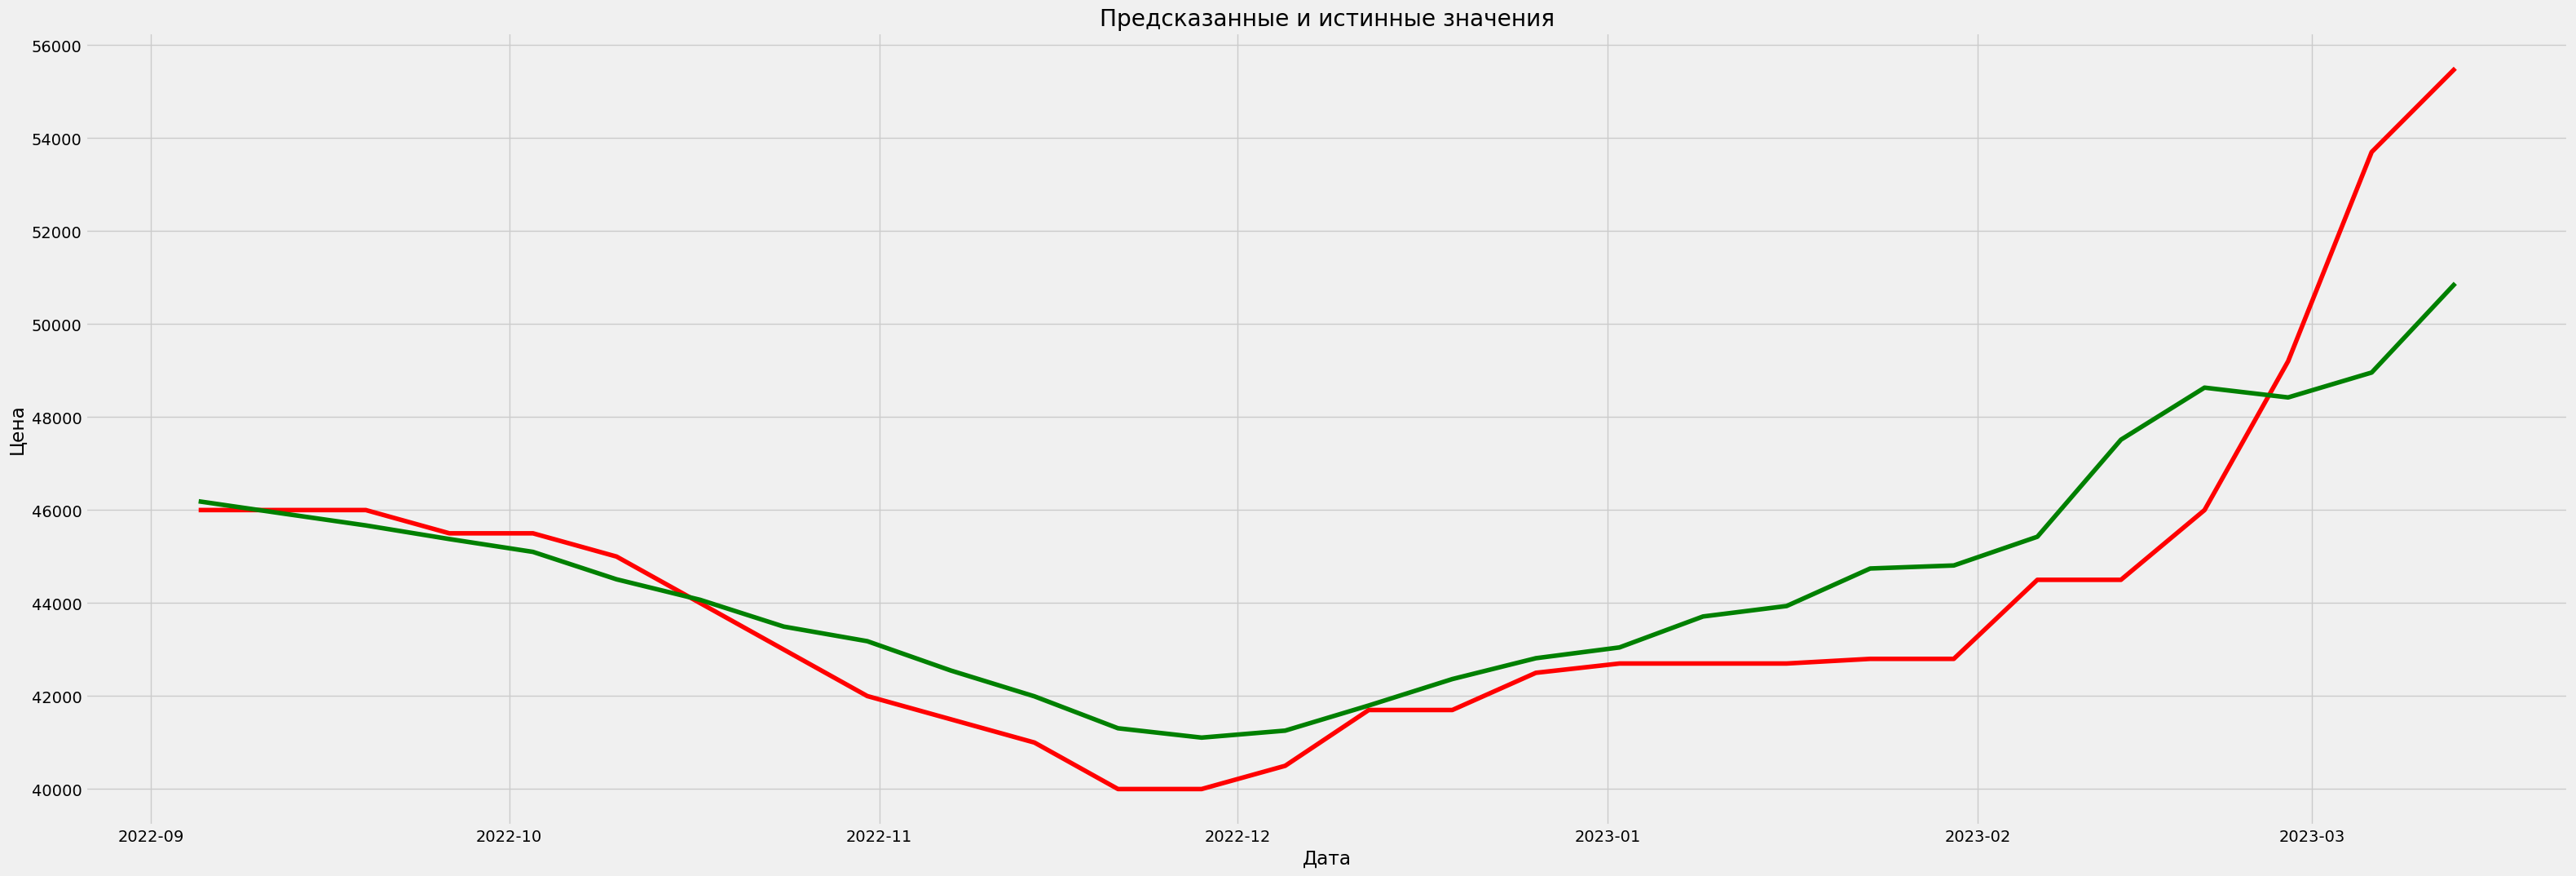

In [35]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(35, 12))
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.title("Предсказанные и истинные значения")
 
plt.plot(target_df['Цена на арматуру'], c = 'r')
plt.plot(target_df['predict_target'], c = 'g')

In [36]:
target_df["predict_target"].min(), target_df["predict_target"].max()

(41106.31595204538, 50875.590711616336)

In [37]:
print(f'RMSE score is {np.sqrt(mean_squared_error(target_df["Цена на арматуру"], target_df["predict_target"]))}')

RMSE score is 1692.2181602073458
